In [1]:
import glob
import numpy as np

import matplotlib.pyplot as plt
import os
from PIL import Image

In [3]:
targets = []
features = []

files = glob.glob('/home/fchoura/Bureau/exo/test/*.jpeg')

for file in files:
    features.append(np.array(Image.open(file).resize((200,200), Image.NEAREST)))
    if 'foam' in file:
        targets.append(0)
    elif 'water' in file:
        targets.append(1)
    elif 'co2' in file:
        targets.append(2)
    elif 'wetchemical' in file:
        targets.append(3)
    elif 'powder' in file:
        targets.append(4)
#im = Image.open(file)
#im1 = im.resize((75,75), Image.NEAREST)
#print(np.shape(im1))
#features = np.array(features)


targets = np.array(targets)
print(type(targets))
print(targets)
#print("features shape", features)
print("Targets shape", targets.shape)

<class 'numpy.ndarray'>
[0 0 1 0 1 2 0 3 1 2 0 1 1 0 2 0 0 0 0 0 1 2 0 0 0 3 4 1 2 2 0 1 4 0 1 0 2
 0 3 3 2 0 0 0 0 0 0 3 3 1 0 0 1 0 3 0 0 0 0 4 3 1 1 0 0 4 1 0 0 0 0 4 0 1
 0 4 3 0 3 0 4 1 1 0 0 0 0 3 0 0 3 4 0 4 1 3 1 3 2 0 0 1 0 0 0 0 0 0 1 2 2
 0 4 3 2 1 0 0 0 0 0 0 3 3 0 0 0 3 3 1 1 3 0 0 0 0 3 0 0 3 2 0 0 0 0 0 4 1
 4 4 0 0 2 0 3 0 0 1 1 3 0 3 1 0 3 3 0 2 0 3 1 1 0 1 0 3 0 4 4 0 1 4 3 0 1
 0 2 0 1 4 1 0 0 0 0 0 1 0 0 1 1 0 0 3 2 0 1 0 4 0 0 0 0 4 2 4 1 0 3 3 0 0
 0 0 3 1 1 3 0 0 0 0 0 0 2 0 0 3 3 0 0 3 2 0 0 3 4 4 2 4 4 4 2 4 0 0 0 0 0
 0 0 3 4 1 0 1 1 1 3 1 0 0 4 1 0 0 1 2 0 2 1 3 0 3 0 1 2 0 0 3 0 0 0 0 1 3
 2 4 0 0 3 1 4 1 3 0 3 1 2 0 4 2 1 2 0 0 0 0]
Targets shape (318,)


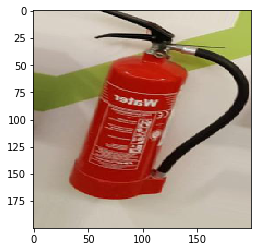

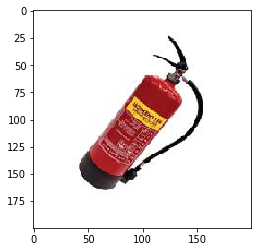

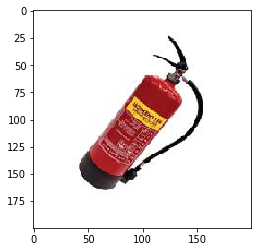

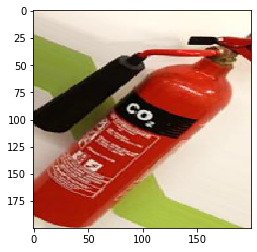

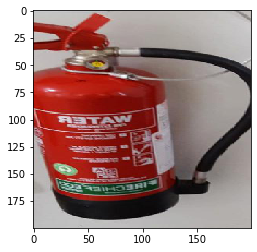

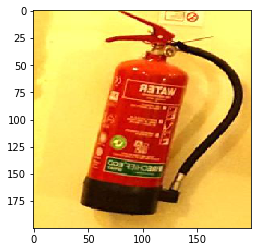

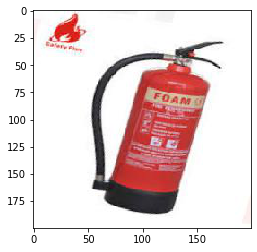

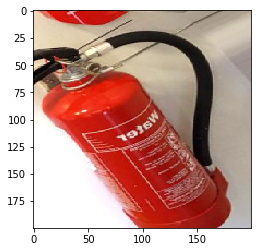

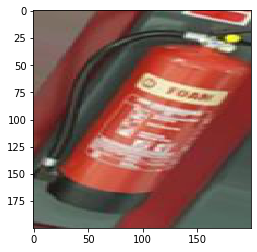

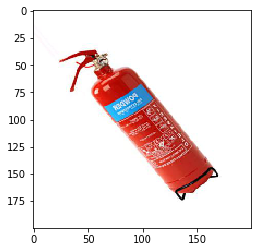

In [4]:
from random import randint

for a in [randint(0, len(features)) for _ in range(10)]:
    plt.imshow(features[a], cmap="gray")
    plt.show()

In [5]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [8]:
# define location of dataset
folder = '/home/fchoura/Bureau/exo/test/'
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):

    if file.startswith('water'):
        output = 0.0
    if file.startswith('foam'):
        output = 1.0
    if file.startswith('co2'):
        output = 2.0
    if file.startswith('wetchemical'):
        output = 3.0
    if file.startswith('powder'):
        output = 4.0
    # load image
    photo = load_img(folder + file, target_size=(200, 200))
    # convert to numpy array
    photo = img_to_array(photo)
    # store
    photos.append(photo)
    labels.append(output)
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('extinguishers_photos.npy', photos)
save('extinguishers_labels.npy', labels)

(318, 200, 200, 3) (318,)


In [9]:
from numpy import load
photos = load('extinguishers_photos.npy')
labels = load('extinguishers_labels.npy')
print(photos.shape, labels.shape)

(318, 200, 200, 3) (318,)


In [10]:
# create directories
import os
dataset_home = 'extinguishers/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['foam/', 'water/', 'co2/', 'wetchemical/', 'powder/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        os.makedirs(newdir, exist_ok=True)

In [12]:
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = '/home/fchoura/Bureau/exo/test/'
for file in listdir(src_directory):
    src = src_directory + '/' + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    if file.startswith('water'):
        dst = dataset_home + dst_dir + 'water/'  + file
        copyfile(src, dst)
    elif file.startswith('foam'):
        dst = dataset_home + dst_dir + 'foam/'  + file
        copyfile(src, dst)
    elif file.startswith('co2'):
        dst = dataset_home + dst_dir + 'co2/'  + file
        copyfile(src, dst)
    elif file.startswith('powder'):
        dst = dataset_home + dst_dir + 'powder/'  + file
        copyfile(src, dst)
    elif file.startswith('wetchemical'):
        dst = dataset_home + dst_dir + 'wetchemical/'  + file
        copyfile(src, dst)

In [17]:
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 

# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = datagen.flow_from_directory('extinguishers/train/',
        class_mode='binary', batch_size=64, target_size=(200, 200))
    test_it = datagen.flow_from_directory('extinguishers/test/',
        class_mode='binary', batch_size=64, target_size=(200, 200))
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=1, verbose=1)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
 


In [18]:
# entry point, run the test harness
run_test_harness()

Found 234 images belonging to 5 classes.
Found 84 images belonging to 5 classes.
Epoch 1/1
4/4 [==============================] - 16s 4s/step - loss: -208.5404 - accuracy: 0.4829 - val_loss: -8440.9951 - val_accuracy: 0.4881
> 48.810


In [21]:
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import json


# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model
 
# plot diagnostic learning curves
'''def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()'''
 
# run the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = datagen.flow_from_directory('extinguishers/train/',
        class_mode='binary', batch_size=64, target_size=(200, 200))
    
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it), epochs=1, verbose=2)
    
    # learning curves
    #summarize_diagnostics(history)
    # save model
    
# lets assume `model` is main model 
    model_json = model.to_json()
    with open("model_in_json.json", "w") as json_file:
        json.dump(model_json, json_file)

    model.save_weights("model_weights.h5")


In [22]:
run_test_harness()

Found 234 images belonging to 5 classes.
Epoch 1/1
 - 30s - loss: -4.9386e+02 - accuracy: 0.3889


In [32]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from keras.models import model_from_json
import json




 
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(200, 200))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 200, 200, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img
 
# load an image and predict the class
def run_example():
    # load the image
    img = load_image('/home/fchoura/Bureau/exo/jeu de données/co2/co2_test/co2 (152).jpeg')
    # load model
    with open('model_in_json.json','r') as f:
        model_json = json.load(f)

    model = model_from_json(model_json)
    model.load_weights('model_weights.h5')
    # predict the class
    result = model.predict(img)
    print(result[0])

In [33]:
run_example()

[1.]
